Convolution Network

https://pytorch.org/tutorials/_images/mnist.png


In [12]:
%config IPCompleter.greedy=True
%matplotlib inline

import datetime

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

In [3]:
class TestNet(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv = nn.Conv2d(1, 2, 1)
        self.lin = nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y = self.lin(x)
        return y


In [4]:
net = TestNet()
params = list(net.parameters())
params

[Parameter containing:
 tensor([[-0.4941]], requires_grad=True), Parameter containing:
 tensor([-0.6368], requires_grad=True)]

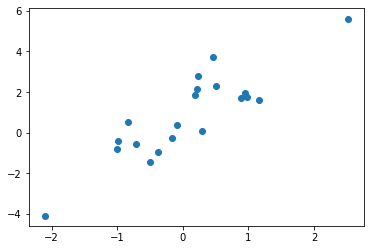

In [5]:
x_raw = np.random.randn(20)
y_raw = (2 * x_raw + 1) + np.random.randn(20)
x = np.asarray(x_raw, dtype=np.float32).reshape(-1, 1)
y = np.asarray(y_raw, dtype=np.float32).reshape(-1, 1)
plt.scatter(x,y)

Training of the model

In [6]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
epochs = 100
input_var = Variable(torch.from_numpy(x))
labels = Variable(torch.from_numpy(y))

In [13]:
start = datetime.datetime.now()

# setting up mode
net.train()
for i in range(20):
    # making sure that it is not tracking old gradients 
    optimizer.zero_grad()    
    
    output = net.forward(input_var)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    print("epoch = {}\t loss = {}\t m:{} \t b:{}".format(i, loss, params[0].item(), params[1].item()))
end = datetime.datetime.now()

print ("Total time in milisecond : {}".format( int((end-start).total_seconds() * 1000)))

Total time in milisecond : 794


Prediction

In [8]:
net.eval()
predicted = net.forward(input_var).data.numpy()
predicted

array([[-0.0439037 ],
       [-0.05951063],
       [-0.35793215],
       [-0.06449269],
       [ 0.5835801 ],
       [-0.40594667],
       [-0.7161437 ],
       [-0.147879  ],
       [ 0.01785025],
       [-0.22902036],
       [-0.07414756],
       [-0.26403302],
       [-0.32571346],
       [ 0.12378621],
       [ 0.15202004],
       [-0.40388843],
       [ 0.00659087],
       [-0.17050764],
       [ 0.14235714],
       [ 0.20337903]], dtype=float32)

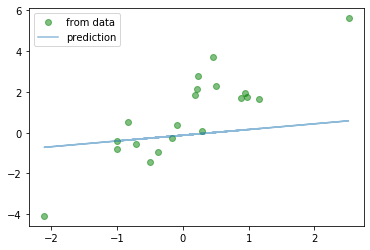

OrderedDict([('lin.weight', tensor([[0.2812]])), ('lin.bias', tensor([-0.1241]))])


In [9]:
plt.plot(x, y, 'go', label = 'from data', alpha = .5)
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(net.state_dict())

GPU Training


In [19]:
net.cuda()

start = datetime.datetime.now()
net.train()
for i in range(20):
    input_var = Variable(torch.from_numpy(x).cuda())
    labels = Variable(torch.from_numpy(y).cuda())

    optimizer.zero_grad()    

    output = net.forward(input_var)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    #print("epoch = {}\t loss = {}\t m:{} \t b:{}".format(i, loss, params[0].item(), params[1].item()))
end = datetime.datetime.now()

print ("Total time in milisecond : {}".format( int((end-start).total_seconds() * 1000)))

Total time in milisecond : 29
